It's possible to do full ML projects without knowing any of the internal details for how anything works. The past two chapters were completed with mild understanding of what was occurring. However, having an understanding of how things work can help tremendously with choosing the correct model, training algo to use, and hyperparams to use for your task. It will also help with error analysis as well as being able to understand, build, and train neural networks.

This chapter will start with Linear Regression (one of the simplest models to use) and will talk about two very, *very* different ways to train it.

* Option 1 is to use a "closed-form" equation that directly computes the model params that best fit the model to the training set (the model params that minimize the cost function over the training set)

* Option 2 is to use an iterative optimization approach called Gradient Descent (remember this from Calc III?). This approach gradually tweaks the model params to minimize cost over the training set, eventually converging to the same set of params as the first method. We'll look at a few variants that will make a comeback when we study neural networks (Batch GD, Mini-batch GD, and Stochastic GD)

After that, we'll look at Polynomial Regression, which is a more complex model that can fit non-linear data. Since it has more params the Linear Regression, it's more prone to overfitting the training data; we'll look at how to detect whether or not this is the case using learning curves, then we'll look at several regularization techniques that can help reduce the risk of overfitting the training set.

Lastly, we'll look at two more models that are commonly used for classification tasks: Logistic Regression and Softmax Regression.

*Warning: there will be a __LOT__ of linear algebra and calculus equations used here! We'll do things like transposing vectors and matrices, calculating dot products, finding inverse matrices, and partial derivatives*

## Linear Regression

A linear model makes a prediction by simply computing a weighted sum of the input features plus a constant known as the *bias term* (or the *intercept term*). The equation is given as follows:

$$\hat{y} = \theta_0 + \theta_1x_1 + ... + \theta_nx_n$$

* $\hat{y}$ is the predicted value
* $n$ is the number of features
* $x_i$ is the $i^{th}$ feature value
* $\theta_j$ is the $j^{th}$ model parameter (including the bias term $\theta_0$ and the feature weights $\theta_1, \theta_2,...,\theta_n$)

A more concise, vectorized version is given as follows:

$$\hat{y} = h_0(\vec{x}) = \theta^T \cdot \vec{x}$$

* $\theta$ is the model's *parameter vector*, containing the bias term $\theta_0$ and the feature weights $\theta_1 \text{to } \theta_n$
* $\theta^T$ is the transpose of $\theta$ (a row vector instead of a column vector).
* $\vec{x}$ is the instance's *feature vector*, containing $x_0 \text{to } x_n$ with $x_0$ always equal to 1
* $\theta^T \cdot \vec{x}$ is the dot product of $\theta^T$ and $\vec{x}$
* $h_0$ is the hypothesis function, using the model parameters $\theta$

So that's the model; how do we train it? To train a model, we must set the parameters so that the model best fits the training set. For this, we need a measurement of how well (or poorly) the model fits said training data. Chapter 2 introduced the most common performance measure for regression models: Root Mean Square Error (RMSE). Therefore, to train a linear regression model, we need to find the value of $\theta$ that minimizes the RMSE.

*Note: In practice, it's usually easier to minimize the Mean Square Error (MSE) instead of the RMSE, since minimizing the MSE also minimizes the square root of it)*

The MSE formula for a Linear Regression hypothesis $h_0$ on a training set $\textbf{X}$ is calculated using the following equation (also found in the iPad notes):

$$MSE(\textbf{X}, h_\theta) = \frac{1}{m}\sum^m_{i = 1}\Big(\theta^T \cdot \textbf{x}^i - y^{(i)}\Big)^2$$

where
* $\textbf{X}$ is the matrix of all feature variables (one row per instance; $i^{th}$ row is the transpose of $\textbf{x}^i$
* $m$ is the number of instances in the dataset that is being measured
* $\textbf{x}^i$ is the vector of all of the feature values of the $i^{th}$ instance
* $y^i$ is the corresponding label
* $h_\theta$ is the system's prediction function (hypothesis) where $\hat{y}^i = h(\textbf{x}^i)$

*Note: For RMSE, just take the square root of the entire right side of the above equation.*

From here on out, instead of writing $MSE(\textbf{X}, h_\theta)$, we'll write $MSE(\theta)$

### The Normal Equation

To find the value of $\theta$ that minimizes the cost function, there is a *closed-form solution* (a mathematical equation that directly yields the result). This is called the *Normal Equation* and is given as follows:

$$\hat{\theta} = \Big(\textbf{X}^T \cdot \textbf{X}\Big)^{-1} \cdot \textbf{X}^T \cdot \textbf{y} $$

where

* $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function.
* $\textbf{y}$ is the vector of target values containing $y^1$ to $y^m$

Let's generate some linear-looking data to test this equation on.

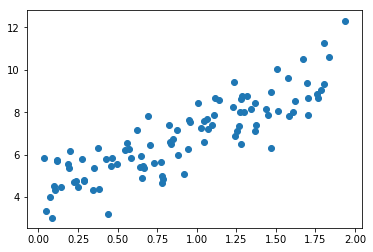

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1) # Give us some numbers
y = 4 + 3 * X + np.random.randn(100, 1) # Give us some randomly generated target values.
                                        # We used the equation y = 4 + 3x + some Gaussian distributed random values

# Let's look at our data
plt.scatter(X, y)
plt.show()

Now let's compute $\hat{\theta}$ using the Normal Equation. For this, we'll use the `inv()` function from Numpy's linear algebra module (`np.linalg`) to compute the inverse of a matrix, and the `dot()` method for matrix multiplication.

In [2]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance, as needed above
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # Code version of the above equation

theta_best #optimally, we'd get 4 and 3 but the noise makes that impossible. But 4.047 and 2.970 are really damn close

array([[4.141514  ],
       [2.96059632]])

In [3]:
# Let's make predictions with this value

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # Add x0 = 1 to each instance again
y_predict = X_new_b.dot(theta_best) # make some predictions
y_predict

array([[ 4.141514  ],
       [10.06270665]])

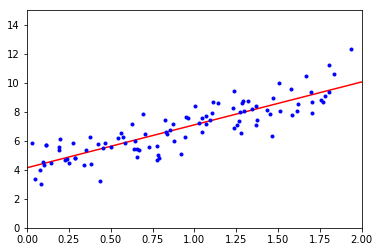

In [4]:
# Time to plot the predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# Not bad!

In [5]:
# The equivalent SkLearn code is the following

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


(array([4.141514]), array([[2.96059632]]))

In [6]:
lin_reg.predict(X_new)

array([[ 4.141514  ],
       [10.06270665]])

### Computation Complexity

The Normal Equation computes the inverse of $\textbf{X}^T \cdot \textbf{X}$ which is an *n x n* matrix (where *n* is the number of features. The *computational complexity* of inverting a matrix is typically in the range of $O(n^{2.4})$ to $O(n^3)$ (depending on implementation. This is a *really* bad runtime (as you know) and it means that (in most cases) having 100,000+ features (or numbers in that area) will make calcuating this equation quite slow.

Memory wise, it is linear space ($O(m)$) so the memory side is efficiently handled (providing there is enough space).

## Gradient Descent

*Gradient Descent* is a generic optimization algo that can find solutions to a wide variety of problems. The general idea is to find a local (or global) minimum for your cost function. You can calculate the gradient at a point (which is the directon of steepest ascent) and go the opposite direction until a local min (or global min) is reached.

To do this, we start by filling $\theta$ with random values (called *random initialization*) and then improve it gradually.

__An important parameter to Gradient Descent is the size of the steps, determined by the *learning rate* hyperparameter. Too small, and the algorithm will take a long time. Too big, and we'll just jump across back and forth and never reach a value__

One last issue is that cost functions can be messy. Reaching plateaus, local minima, or even holes in the graph are quite common. Luckily for us, the MSE is a *convex function*, so we're to know that we'll only have a global minimum and no local minima. This is because if you pick any two points on the curve, the line segment that joins them will never cross the curve.

*Note: when using Gradient Descent, make sure that all features have a similar scale. Use SkLearn's `StandardScaler` for this, otherwise it'll take a much longer time to converge than it would have otherwise.*

Training a model with this method really implies searching the parameter space of the model for the combination that minimizes a cost function over the training set. The more parameters a model has (so the more dimensions our space has) the harder the search becomes.

### Batch Gradient Descent

Quite obviously, to implement GD we need to compute the gradient of the cost function with regards to each model parameter $\theta_j$. In other words, we need to calculate how much the cost function would change if we changed $\theta_j$ by just a little bit. This is known in calculus as a *partial derivative*. An equation for computing a single partial derivative of the cost function with regards to just the parameter $\theta_j$ is as follows:

$$\frac{\partial}{\partial\theta_j}MSE(\theta) = \frac{2}{m}\sum_{i=1}^m\Big(\theta^T \cdot \textbf{x}^i - y^i\Big)x^i_j$$

Whew. Instead of using that mess over and over for each parameter individually, we can use the next formula to calculate them all in one go. The gradient vector (written $\bigtriangledown_\theta MSE(\theta)$ contains all of the partial derivatives of the cost function (one per model parameter)

$$\bigtriangledown_\theta MSE(\theta) = \text{vector of partial derivatives } = \frac{2}{m}\textbf{X}^T \cdot \Big(\textbf{X} \cdot \theta - \textbf{y}\Big)$$

Notice that this formula involves calculations over the full training set $\textbf{X}$ at **each** step of the Gradient Descent! This is why it's caleld *Batch Gradient Descent*; it uses the entire batch of training data at each step. Because of this, it's *terribly* slow with very large training sets (but we'll look at much faster algorithms shortly). However, GD scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation.

Once you have the gradient vector (which points in the direction of steepest ascent) simply go the opposite direction. This means subtracting $\bigtriangledown_\theta MSE(\theta)$ from  $\theta$. This is where the learning rate $\eta$ comes into play: multiply the gradient vector by $\eta$ to determine the size of our downhill step. This equation is given in full as follows:

$$\theta^{\text{next step}} = \theta - \eta\bigtriangledown_\theta MSE(\theta)$$

Here's a quick implementation of the algorithm:

In [7]:
eta = 0.1 # learning rate to use
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # return 2x1 array of randomly chosen numbers from the Gaussian distribution

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[4.141514  ],
       [2.96059632]])

Those are the same numbers that we found using the Normal Equation earlier (both in SKLearn and on our own)! But what if we changed the learning rate?

If we would have used $\eta = 0.02$, then our 1,000 iterations may not have been enough to get to the values we had. If we used a higher one, say $\eta = 0.5$,  then we would have missed the mark completely and been wildly too large.

To find a good learning rate, we can use grid search (see Chapter 2) but we would probably limit the number of iterations so that grid serach could eliminate models that take too long to converge.

The next natural question is how to set the number of iterations. If that's too low, you risk being too far from the optimal solution when the algorithm stops, but if it's too high, then you'll waste a bunch of time while parameters don't change. A simple solution is to set a very large number of iterations but to interrupt the algo when the gradient vector becomes tiny–that is, when its norm becomes smaller than a tiny number $\epsilon$ (called the *tolerance*)–because this happens when Gradient Descent has (almost) reached a minima.

*Note about __convergence rate__*: If the cost function is convex and its slope doesn't change abruptly (like for MSE), Batch Gradient Descent with a fixed learning rate will eventually converge to the optimal solution, but you may have to wait a while: it can take $O(\frac{1}{\epsilon})$ iterations to reach the optimum within a range of $\epsilon$ depending on the shape of the cost function. If you divide the tolerance by 10 to have a more precise solution, then the algorithm will have to run approximately 10 times longer

### Stochastic Gradient Descent

The main problem with BGD is that it has to use the whole training set to compute gradients at each step, making it very slow with large training sets. At the opposite extreme, *Stochastic Gradient Descent* just picks a random instance in the training set at every step and computes the gradients based *__only on that single instance__*. This will (obviously) make the algo much faster since it has less data to manipulate each iteration. It also makes it possible to train on huge sets since only one instance needs to be in memory at each iteration (so SGD can be implemented as an out-of-core algorithm).

On the other hand, due to its random nature (hence *stochastic*), this algorithm is much less regular the BGD: instead of gently decreasing until it reaches the minimum, the cost function will bounce around decreasing only on average. Over time it'll end up close to the minimum, but once it gets there it will continue to bounce around. Therefore, once the algo finishes, its parameter values are good, but not optimal. When the cost function is very irregular, this can actually help the algorithm jump out of local minima. This means that SGD has a better chance of finding the global minimum than BGD does.

Randomness is good to escape from local optima, but bad because it means that the algorithm will never settle at the minimum. One solution to this problem is gradual reduction of the learning rate. The steps start out big (which helps escape local minima and make quick progress) but gradually get smaller and smaller (allowing the algo to settle at the global minimum). This process is known as *simulated annealing* because it resembles the process of annealing in metallurgy where motel metal is slowly cooled. The function that determines that learning rate at each iteration is called the *learning schedule*. If the learning rate is reduced too quickly, you may get stuck in a local minimum or even end up frozen halfway to the minimum. If reduced too slowly, you may jump around the minimum for a while and end up with a suboptimal solution if you halt training too early.

The following code implements SGD using a simple learning schedule:

In [8]:
n_epochs = 50
t0, t1, = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # calculate the gradients at this point
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
# We iterate by rounds of m iterations (called epochs). BGD iterated 1,000 times, whil this will iterate only 50 times
# and will reach a decent solution
theta

array([[4.14114002],
       [3.00326332]])

Note that since we're picking instances randomly, there is a chance that some instances may be picked several times per epoch while others won't be picked at all. To be sure that the algo will go through every instance at each epoch, another approach is to shuffle the training set and go through it instance by instance, then shuffle again, and repeat. This genereally will converge more slowly.

The below code does what the above code does, but in SkLearn

In [9]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([4.11937183]), array([2.92578804]))

### Mini-batch Gradient Descent

Lastly, we'll look at *Mini-batch Gradient Descent*. It's simple to understand once Batch and Stochastic are known: at each step, instead of computing the gradients with the full set or with just one instance, we compute the gradients on small random sets of instances called *mini-batches*. The main advantage of this is that we can get a performance boost from hardware optimizations of matrix operations, especially when using GPUs.

The algorithm's progress in parameter space is less erratic than with SGD, especially if the mini-batches are fairly large. As a result, Mini-batch GD will end up a walking a bit closer to the minimum than SGD, but it may be harder for it to escape from local minima. Let's make a table to review the algorithms so far

Algorithm | Large *m* | Out-of-core support | Large *n* | Hyperparams | Scaling required | SkLearn
--- | --- | --- | --- | --- | --- | ---
Normal Equation | Fast | No | Slow | 0 | No | `LinearRegression`
Batch GD | Slow | No | Fast | 2 | Yes | n/a
Stochastic GD | Fast | Yes | Fast | ≥ 2 | Yes | `SGDRegressor`
Mini-batch GD | Fast | Yes | Fast | ≥ 2 | Yes | `SGDRegressor`

Remember: After training, there really isn't a difference between the algorithms. They end up with similar models and make predictions in identical manners.

## Polynomial Regression

What do you do if the data is more complex than a simple straight line? Surprisingly, we can still use a linear model to fit nonlinear data if we add powers of each feature as new features, then train the linear model on the extended set of features. This technique is known as *Polynomial Regression*.

Here's an example in which we generate some nonlinear data based on a simple *quadratic equation* + noise. We'll use the quadratic equation $y = 0.5x^2 + x + (2 + \text{random noise})$

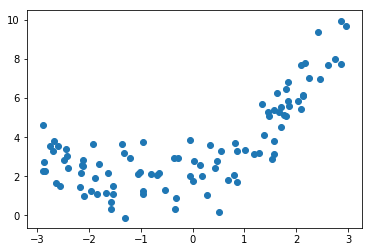

In [10]:
m = 100
X = 6 * np.random.rand(m , 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Let's graph it
plt.scatter(X, y)
plt.show()

In [11]:
# Let's use SKlearn's PolynomialFeatures to transform our data by adding the square of each feature
# in the training set as new features

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.64855423])

In [12]:
X_poly[0]

array([-0.64855423,  0.42062259])

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
y_predict = lin_reg.predict(X_poly)
lin_reg.intercept_, lin_reg.coef_

(array([2.07820735]), array([[0.98971426, 0.49578599]]))

The model predicted that we're using $\hat{y} = 0.56x_1^2 + 1.03x_1 + 1.97$ when we know that the original equation we used was $y=0.5x_1^2 + x + 2 + \text{random noise}$, so that was pretty close

## Learning Curves

If you use a high degree Polynomial Regression, you'll (probably) fit the training data much better than LinearRegression would. This is obviously a *severe* overfit of the training data, while the linear model will probably underfit with quadratic data. The issue arises when we don't know what function generated the data; how can we decide how complex our model should be, and how can we tell if we're overfitting/underfitting the data?

In Chapter 2, we used cross-validation to get an estimate of the model's generalization performance. If it performs well on training data but generalizes poorly according to cross-validation metrics, then we're overfitting. If it performs poorly on both, then we're underfitting. This is one way to tell if our model is too simple/complex.

Another way is to look at the *learning curves*: these are plots of the model's performance on the training set and the validation set as a function of the training set size (or the training iteration). To generate these plots, simply train the model several times on different sized subsets of the training set. The following code defines a function that plots the learning curves of a model given some training data:

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

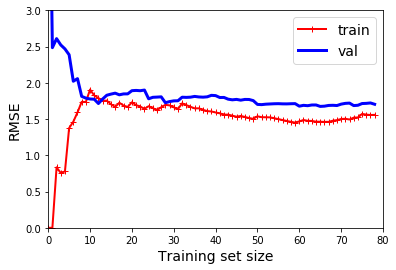

In [15]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

# y axis is RMSE, x axis is the size of the training set
# blue line is the validation data, red line is the training data

Explanation. At low numbers, the model can fit perfectly. But, as new instances are added to the training set, it becomes impossible for the model to fit the data perfectly (since it's not linear and is noisy). Eventually, the data plateaus, at which point adding new instanes doesn't make it better or worse on average. On the validation data, the model is incapable of generalizing properly and the error is quite big. As the model is shown more examples, it learns and the validation error starts to go down. However, since a straight line can't do a good job modeling nonlinear data, we plateau close to the other curve.

These curves are typical of a model that underfits: both curves hae plateaued fairly high and close to each other.

*Note: if the model underfits, simply chucking more data won't fix it. We need a more complex model*

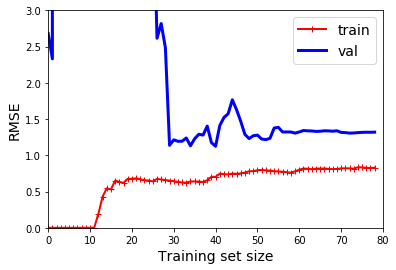

In [16]:
# Now let's check the learning curves of a 10th degree polynomial
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

There are two important differences between our plots:
* The error on the data is much lower than it was previously
* There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. *__However, with more data, the two curves would continue to get closer together__*.

*Note on the __Bias/Variance Tradeoff__*: The generalization error of a model can be expressed as the sum of three very different errors.

*Bias*
* This part of the generalization error is due to wrong assumpetions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data. Note that this isn't the same bias as we see in linear models.

*Variance*
* This part is due to the model's excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance, and thus overfit the training data.

*Irreducible Error*
* This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g. fix sources (such as broken sensors) or detect and remove outliers.

Increasing a model's complexity will typically increase its variance and reduce its bias. Conversely, reducing a model's complexity increases its bias and reduces its variance, hence the tradeoff.

## Regularized Linear Models

A good way to reduce overfitting is to regularize the model (aka to constrain it, see chapters 1 and 2). The fewer degrees of freedom the model has, the harder it will be for it to overfit the data. For example, a simple way to regularize a polynomial model is to reduce the number of of polynomial degrees.

For a linear model, regularization is usually accomplished by constraining the weights of the model. We'll look at three ways to do this (Ridge Regression, Lasso Regression, and Elastic Net)

### Ridge Regression

*Ridge Regression* (aka *Tikhonov regularization*) is a regularized version of Linear Regression; a *regularization term* equal to $\alpha\sum_{i=1}^n\theta^2_i$ is added to the cost function. This forces the algo to not only fit the data, but to keep the model weights as small as possible as well.

*Note: this term should only be added to the cost function during training. Once trained, you want to evaluate the model's performance using the unregularized performance measure. It's quite common for the cost funtion used during training to be different from the performance measure used for testing. Apart from regularization, another reason why they might be different is that a good training cost function should have optimization-friendly derivatives, while the performance measure used for testing should be as close as possible to the final objective.*

The hyperparameter $\alpha$ controls how much you want to regularize the model. If $\alpha = 0$, then Ridge Regression == Linear Regression. If $\alpha$ is very large, then all weights end up very close to zero and the result is a flat line going through the data's mean. The equation for the cost function of Ridge Regression is given as follows:

$$J(\theta) = MSE(\theta) + \alpha\frac{1}{2}\sum_{i=1}^n\theta^2_i$$

*In the above equation, the $J(\theta)$ refers to cost functions that do not have a short name*

Note that the bias term $\theta_0$ is not regularized (the sum starts at $i = 1$ not 0). If we define __w__ as the vector of feature weights ($\theta_1$ to $\theta_n$), then the regularization term is simple equal to $\frac{1}{2}\Big(\|\textbf{w}\|_2\Big)^2$ where $\|\cdot\|_2$ represents the $\ell_2$ norm of the weight vector. For Gradient Descent, just add $\alpha\textbf{w}$ to the MSE gradient vector.

*Note: it is important to scale the data (using a `StandardScaler` or another method) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.

A closed-form solution for Ridge Regression is given as follows:

$$\hat{\theta} = \Big(\textbf{X}^T \cdot \textbf{X} + \alpha\textbf{A}\Big)^{-1} \cdot \textbf{X}^T \cdot \textbf{y}$$

Here's how to do it with SKLearn using closed-form solution

In [17]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.94057969]])

And here's how to do it using Stochastic Gradient Descent

In [18]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([3.9829664])

The `penalty` hyperparam sets the type of regularization to use. Specifying `"l2"` indicates that you want SGD to add a regularization term to the cost function equal to half the square of the $\ell_2$ norm of the weight vector (aka Ridge Regression)

### Lasso Regression

*Least Absolute Shrinkage and Selection Operator Regression* a.k.a. *Lasso Regression* is another regularized version of Linear Regression; just like Ridge Regression, it adds a regularization term to the cost function, but it uses the $\ell_1$ norm of the weight vector instead of half the square of the $\ell_2$ norm. The equation is given below:

$$J(\theta) = MSE(\theta) + \alpha\sum_{i=1}^n\mid\theta_i\mid$$

An important characteristic of this kind of regression is that it tends to completely eliminate the weights of the least immportant features (aka set them to 0). In other words, Lasso Regression performs feature selection automatically and outputs a *sparse model*.

*Note: on the Lasso cost function, the BGD past tends to bouse across the gutter towards the end. This is because the slope abruptly changes at $\theta_2 = 0$. You need to graduatlly reduce the learning rate in order to actually converge to the global minimum.

The Lasso cost function isn't differentiable at $\theta_1 = 0$ (for $i = 1, 2, \cdots, n$) but Gradient Descent still works just fine if you use a *subgradient vector* $\textbf{g}^{15}$ instead when any $\theta_1 = 0$. See the book for an equation shows a subgradient vector equation you can use for Gradient Descent with the Lasso cost function.

### Elastic Net

Elastic Net is a midpoint between Ridge and Lasso. The regularization term is a simple mix of both regression terms of the aforementioned models, and the mix ratio $r$ can be controlled. When $r = 0$, Elastic Net is equivalent to Ridge Regression, and when $r = 1$, Elastic Net is equivalent to Lasso Regression. Here's the equation for this cost function:

$$J(\theta) = MSE(\theta) + r\alpha\sum_{i=1}^n\mid\theta_i\mid + \frac{1-r}{2}\alpha\sum_{i=1}^n\theta_i^2$$

When should you use Linear Regression vs Ridge vs Lasso vs Elastic Net? It's usually preferable to have some regularization, so Linear Regression alone should be avoided. Ridge is a good default, but if it is suspected that only a few features are actually useful, then either Lasso or Elastic Net should be used instead. In general, Elastic Net is prefered over Lasso since Lasso may behave erratically when the number of features is greated than the number of training instances or when several features are strongly correlated.

Here's a short example of using SKLearn's `ElasticNet` (`l1_ratio` corresponds to the mix ratio $r$):

In [19]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.89790852])

### Early Stopping

Another different way to regularize iterative learning algos like Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called *early stopping*. By stopping at a minimum point of RMSE, you stop just before the model begins to overfit. With Stochastic and Mini-batch GD, the curves aren't so smooth and so it may be harder to know whether the minimum has been reached or not. One solution is to stop only after the validation error has been above the minimum for a while (when you're confident that the model will not do any better) then roll back the model parameters to the point where the validation error was at a minimum.

Here's a basic implementation of Early Stopping:

In [20]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

# Prep data
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off from warm_start
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

In [21]:
best_epoch, best_model

(496, SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
        fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
        loss='squared_loss', max_iter=None, n_iter=1, penalty=None,
        power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
        warm_start=True))

## Logistic Regression

*Logistic Regression* (aka *Logit Regression*) is a regression algorithm that can be used for classification as well as regression. It is commonly used to estimate the probability that an instances belongs to a particular class (so something like "what is the probability that this email is spam?"). If the estimated probability is greater than 50%, the model will predict that the instance belongs to the positive class (labeled "1"). Otherwise, it will predict that it belongs to the negative class (labeled "0"). This makes it a binary classifier.

### Estimating Probabilities

Similar to a Linear Regression model, this model computes a weighted sum of the input features (plus the bias term). However, instead of outputting the result directly, it outputs the *logistic* of this result. Here's a vectorized form equation for this process:

$$\hat{p} = h_\theta(\textbf{x}) = \sigma\Big(\theta^T \cdot \textbf{x}\Big)$$

The logistic (also called the *logit*), noted $\sigma(\cdot)$, is a *sigmoid function* (which means that it is *S*-shaped) that outputes a number between 0 and 1. Here's an equation and a graph of such a function.

$$\sigma(t) = \frac{1}{1 + e^{-t}}$$

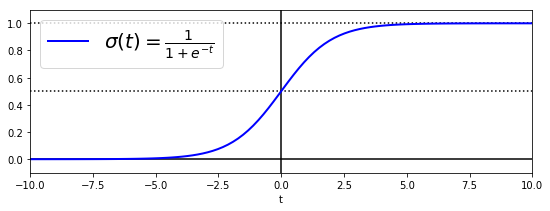

In [22]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

Once the probability $\hat{p} = h_\theta(\textbf{x})$ that an instance __x__ belongs to the positive class is estimated, the model can make the prediction $\hat{y}$ easily by following this simple piecewise function:

$$\begin{align*}\hat{y} = \left\{ \begin{array}{ll} 0 &&\text{ if } \hat{p}\lt0.5 &&\\ 1 &&\text{ if }\hat{p}\geq0.5 \end{array} \right.\end{align*}$$

Notice that $\sigma(t) \lt 0.5$ when $t\lt0$ and $\sigma(t)\geq0.5$ when $t\geq0$, so a Logistic Regression model predicts 1 if $\theta^T \cdot \textbf{x}$ is positive and 0 if it is negative.

### Training and Cost Function

For Logistic Regression, the objective of training is to set the parameter vector $\theta$ so that the model estimates high probabilities for positive instances ($y = 1$) and low probabilities for negative instances ($y = 0$). this idea is captured by the following cost function for a single training instance __x__:

$$\begin{align*}c(\theta) = \left\{\begin{array}{ll} -log(\hat{p})&&\text{ if } y = 1 &&\\ -log(1 - \hat{p}) &&\text{ if } y = 0\end{array}\right.\end{align*}$$

This cost function makes sense since $-log(t)$ grows very large when $t$ approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1 for a negative instance. On the other hand, $-log(t)$ is close to 0 when $t$ is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance, which is precisely what we want!

The cost function for the entire training set is just the average cost over all of the training instances. It can be written as a single expression called the *__log loss__*, shown here:

$$J(\theta) = -\frac{1}{m}\sum_{i = 1}^m\Big[y^ilog\Big(\hat{p}^i\Big) + \Big(1 - y^i\Big)log\Big(1 - \hat{p}^i\Big)\Big]$$

Unfortunately (or fortunately, I guess), there is no known closed-form equation to compute the value of $\theta$ that minimizes this cost function (so there is no equivalent of the Normal Equation). The good news, though, is that this cost function is indeed convex, so Gradient Descent (or any other optimization algo) is guaranteed to find the global minimum (if the learning rate isn't too large and you are patient enough). The partial derivatives of the cost function with regards to the $j^{th}$ model parameter $\theta_j$ is given by the next equation:

$$\frac{\partial}{\partial\theta_j}J(\theta) = \frac{1}{m}\sum_{i = 1}^m\Big(\sigma\Big(\theta^T \cdot \textbf{x}^i\Big) - y^i\Big)x_j^i$$

This equation looks like the one for Batch Gradient Descent; for each instance, it computes the prediction error and multiples it by the $j^{th}$ feature value, and then it computes the average over all training instances. Once this gradient vector is known, we can use it in the BGD algorithm. That's really it for training Logistic Regression! For Stochastic GD we would just use one instance at a time, and for Mini-batch GD we'd use a mini-batch at a time.

### Decision Boundaries

Let's practice Logistic Regression by using the iris dataset. This dataset has a bunch of photos of iris flowers of 3 different species to separate them by sepal and petal length.

In [23]:
# First, load the data

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [24]:
# Now separate into data and labels
X = iris['data'][:, 3:] # petal width
y = (iris['target'] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

# Now to train a Logistic Regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

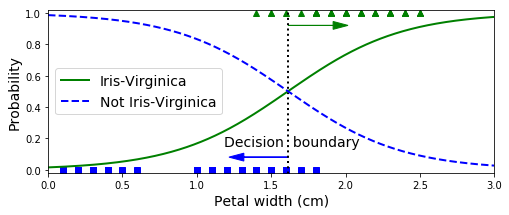

In [25]:
# Let's look at the estimated probabilities for flowers with pedal widths varying from 0 cm to 3 cm
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In our figure, the petal width of Iris-Virginica flowers ranged from 1.4 to 2.5, while the others generally have a smaller petal width ranging from 0.1 to 1.8. At above 2 cm, the classifier is really confident that the flower is an Iris-Virginica, and below 1 cm it is highly confident that the flower is not an Iris-Virginica. In between those, the classifier really isn't too sure. However, if you use `predict()` instead of `predict_proba()`, it'll give you the one in which it has the most confidence. Therefore, there must be a *decision boundary* at around 1.6 where both probabilities are equal to 50%. We can check that as follows

In [26]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

The book has another graph showing the same thing (but displaying both features).

Just like other linear models, Logistic Regression models can be regularized using $\ell_1$ or $\ell_2$ penalties. SKLearn adds an $\ell_2$ penalty by default.

*Note: The hyperparameter controlling regularization strength for `LogisticRegression` in SKLearn is not `alpha` like in other models, but rather is the inverse: `C`. The higher the value of `C` is, the __less__ the model is regularized.*

## Softmax Regression

Logistic Regression models can be generalized to support multiple classes directly without having to train and combine multiple binary classifiers like we did in Chapter 3. This is called *Softmax Regression* or *Multinomial Logistic Regression*.

The idea is pretty simple: when given an instance __x__, the Softmax Regression model will first compute a score $s_k(\textbf{x})$ for each class $k$, then estimates the probability of each class by appling the *softmax function* (also called the *normalized exponential*) to the scores. The equation to compute $s_k(\textbf{x})$ is pretty familiar, since it's just like the equation for Linear Regression prediction:

$$s_k(\textbf{x}) = \Big(\theta^k\Big)^T \cdot \textbf{x}$$

Notice that each class has its own dedicated parameter vector $\theta^k$. All of the vectores are typically stored as rows in a *parameter matrix* $\Theta$

Once the score of every class for the instance __x__ is computed, the probability $\hat{p}$ that the instance belongs to class $k$ can be estimated by running the scores through the softmax function; it computes the exponential of every score, then normalizes them (divide by the sum of all of the exponentials):

$$\hat{p}_k = \sigma(\textbf{s}(\textbf{x}))_k = \frac{e^{s_k(\textbf{x})}}{\sum_{j = 1}^Ke^{s_j(\textbf{x})}}$$

where

* $K$ is the number of classes
* $\textbf{s}(\textbf{x})$ is a vector containing the scores of each class for the instance __x__
* $\sigma(\textbf{s}(\textbf{x}))_k$ is the estimated probability that the instance __x__ belongs to class $k$ given the scores of each class for that instance

Just like Logistic Regression, the Softmax Regression classifier predicts the class with the highest estimated probability (which is just the class with the highest score) as shown by this equation:

$$\hat{y} = \mathop{\text{argmax}}_k \sigma(\textbf{s}(\textbf{x}))_k = \mathop{\text{argmax}}_k s_k(\textbf{x}) = \mathop{\text{argmax}}_k \Big(\Big(\theta^k\Big)^T \cdot \textbf{x}\Big)$$

* the $\text{argmax}$ operator returns the value of a variable that maximizes a function. In this equation, it returns the value of $k$ that maximizes the estimated probability $\sigma(\textbf{s}(\textbf{x}))_k$

*Note: This classifier predicts only one class at a time (multiclass, not multioutput) so it should be used only with mutually exclusive classes (such as different plant types). It can't be used to recognize multiple people in one photo*

Now to train. The objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes). Minimizing the cost function (called the *cross-entropy*), should lead to this objective because it penalizes the model when it estimates a low probability for the target class. Cross entropy is frequently used to measure how well a set of estimated class probabilities match the target classes. Here's the equation:

$$J(\Theta) = -\frac{1}{m}\sum_{i = 1}^m\sum_{k = 1}^K y_k^i\text{log}\Big(\hat{p}_k^i\Big)$$

where

* $y_k^i$ is equal to 1 if the target class for the $i^{th}$ instance is $k$; otherwise, it is equal to 0

If there are just two classes ($K = 2$), then this cost function is equivalent to the cost function for Logisitic Regression (log loss)

#### Cross Entropy

Cross entropy between two discrete probability distributions $p$ and $q$ is defined as $H(p, q) = -\Sigma_xp(x)\text{log}q(x)$ 

The gradient vector of the cost function with regards to $\theta^k$ is given as follows:

$$\bigtriangledown_{\theta^k}J(\Theta) = \frac{1}{m}\sum_{i = 1}^m\Big(\hat{p}_k^i - y_k^i\Big)\textbf{x}^i$$

With this, we can compute the gradient vector for each class, then use Gradient Descent (or any other optimization algo) to find the parameter matrix $\Theta$ that minimizes the cost function.

We can use Softmax to classify the flowers into all there classes. SKLearn's `LogisticRegression` uses one-versus-all by default when trained on more than two classes, but the `multi_class` hyperparameter can be set to "`multinomial`" to switch it to Softmax Regression. You must also specify a solver that supports Softmax Regression such as "`lbfgs`" (see the documentation for more details [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). It also applies $\ell_2$ regularization by default, which can be controlled through the `C` hyperparameter.

In [27]:
X = iris['data'][:, (2, 3)] # petal length, petal width
y = iris['target'] # get corresponding labels

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
# What if we find an Iris with petals that are 5 cm long and 2 cm wide?
softmax_reg.predict([[5, 2]])

# 2 corresponds to Iris_Virginica

array([2])

In [33]:
# Let's look at the probabilities
softmax_reg.predict_proba([[5, 2]])

array([[6.33134079e-07, 5.75276066e-02, 9.42471760e-01]])

# Exercises

### 12) Implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn)

In [34]:
# First, load the data. We'll reuse the iris dataset
X = iris['data'][:, (2,3)] # petal length, petal width
y = iris['target'] # get corresponding labels

In [35]:
# we need to add in the bias term
X_with_bias = np.c_[np.ones([len(X), 1]), X]

# Set the random seed so that this is reproducible. The number itself doesn't matter.
np.random.seed(2042)

In [36]:
# Split the data. Normally, we'd use train_test_split() here but this is without sklearn

# 20% of the data will be used for testing, and 20% for validation with 60% for training
test_ratio = validation_ratio = 0.2

# Get the size of our dataset for use
total_size = len(X_with_bias)

# Get the sizes of each set
test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

# shuffle the indicies into a new list
rnd_indicies = np.random.permutation(total_size)

# Separate out by train, validation, and test sets
X_train = X_with_bias[rnd_indicies[:train_size]]
y_train = y[rnd_indicies[:train_size]]

X_valid = X_with_bias[rnd_indicies[train_size:-test_size]]
y_valid = y[rnd_indicies[train_size:-test_size]]

X_test = X_with_bias[rnd_indicies[-test_size:]]
y_test = y[rnd_indicies[-test_size:]]

In [39]:
# For Softmax, we need target class probabilities. Each instance becomes a one-hot vector, so let's make that now

def to_one_hot(y):
    '''Converts the vector of class indicies to a matrix containing a one-hot vector for each instance'''
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [40]:
# Test our function on the first 10 instances
first_10 = y_train[:10]
to_one_hot(first_10)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [41]:
# It works; let's create target class probabilities matrices for training set and test set
y_train_one_hot = to_one_hot(y_train)
y_valid_one_hot = to_one_hot(y_valid)
y_test_one_hot = to_one_hot(y_test)

Next, implement Softmax function. Recall from earlier that this function has the equation
$$\hat{p}_k = \sigma(\textbf{s}(\textbf{x}))_k = \frac{e^{s_k(\textbf{x})}}{\sum_{j = 1}^Ke^{s_j(\textbf{x})}}$$

In [42]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [43]:
# Define number of inputs and outputs
# almost ready to start training

n_inputs = X_train.shape[1] # should be 3 (two features + 1 bias term)
n_outputs = len(np.unique(y_train)) # should be 3 for the 3 iris classes

n_inputs, n_outputs

(3, 3)

Now for the hard part. In theory, training is just translating those equations from earlier into Python code. In practice, it's trickier than that; in particular, it's easy to mix up the order of the terms, or the indicies. It's even possible to end up with code that *looks* like it works, but computes the totally incorrect thing. When unsure, it's advisable to write down the shape of each term in the equation and make sure the corresponding terms in the code match. Luckily, this is all implemented in sklearn, but it's good to know how it works under the hood.

Remember, the equations we need are

$$J(\Theta) = -\frac{1}{m}\sum_{i = 1}^m\sum_{k = 1}^K y_k^i\text{log}\Big(\hat{p}_k^i\Big)$$

and 

$$\bigtriangledown_{\theta^k}J(\Theta) = \frac{1}{m}\sum_{i = 1}^m\Big(\hat{p}_k^i - y_k^i\Big)\textbf{x}^i$$

Note that $\text{log}\Big(\hat{p}_k^i\Big)$ may not be computable if $\hat{p}_k^i = 0$, so we'll add a small $\epsilon$ value to that term to avoid `nan` values

In [44]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7 # tiny epsilon value to avoid nan

Theta = np.random.randn(n_inputs, n_outputs) # Use the Gaussian distribution to grab a 3x3 matrix of values

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - y_train_one_hot
    
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) # calculate our gradients
    Theta = Theta - eta * gradients # Take a step in the direction of steepest descent

0 5.446183864821945
500 0.8351003035768683
1000 0.6876961554414913
1500 0.6010299835452124
2000 0.5442782811959167
2500 0.5037262742244605
3000 0.4728357293908467
3500 0.4481872508179334
4000 0.4278347262806173
4500 0.4105891022823527
5000 0.3956803257488941


In [45]:
# Our model has now been trained. Let's look at the parameters
Theta

array([[ 3.3172417 , -0.6476445 , -2.99855999],
       [-1.16505434,  0.11283387,  0.10251113],
       [-0.72087779, -0.083875  ,  1.48587045]])

In [46]:
# Let's make predictions on the validation set and check our accuracy
logits = X_valid.dot(Theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

That accuracy is really high... for the sake of it, let's add in $\ell_2$ regularization. The code will be similar to before, just with the loss having the additional $\ell_2$ penalty thrown in and the gradients have the proper additional term. We'll also increase $\eta$ (the learning rate) slightly

In [48]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1 # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs) # same thing as above

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + l2_loss * alpha
    error = y_proba - y_train_one_hot
    
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 5.401694534093341
500 0.5401772166395025
1000 0.505641854654888
1500 0.49548181009973724
2000 0.49167889500397943
2500 0.4901228812144888
3000 0.4894572383423477
3500 0.4891651917494826
4000 0.4890350736136309
4500 0.48897653502667365
5000 0.4889500330754466


In [49]:
# Make our predictions and test our accuracy
logits = X_valid.dot(Theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

In [51]:
# Perfect accuracy! Now to add in early stopping. For this, measure the loss on the validation set at each iteration
# and stop when the error starts to grow

eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1 # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    
    loss = xentropy_loss + l2_loss * alpha
    error = y_proba - y_train_one_hot
    
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients
    
    logits = X_valid.dot(Theta)
    y_proba = softmax(logits)
    
    xentropy_loss = -np.mean(np.sum(y_valid_one_hot * np.log(y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + l2_loss * alpha
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 2.897270765818233
500 0.5703994203168283
1000 0.5426353001362002
1500 0.5353712279883908
2000 0.5331858013860354
2500 0.5326424259886142
2735 0.5326051348802171
2736 0.5326051348941514 early stopping!


In [52]:
# Validate
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Same accuracy, just faster. Time to plot the model's predictions on the entire dataset

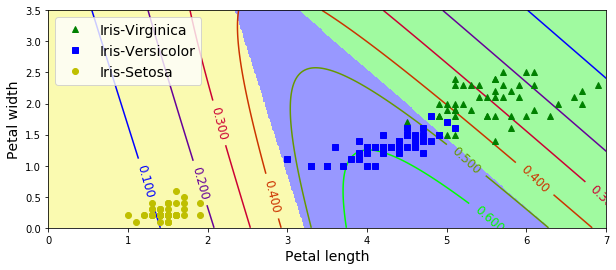

In [53]:
x0, x1 = np.meshgrid(
np.linspace(0, 8, 500).reshape(-1, 1),
np.linspace(0, 3.5, 200).reshape(-1, 1),
)

X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

Now let's try our final model on the test set (remember that set we made?)

In [54]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333

Our model seems to have slight imperfections. This is likely due to the size of the dataset. If we change the random seed a bunch of times and run everything again, we should see different numbers for this final result, and that's completely normal.